#### Introduction
A decision tree is a branching method to illustrate every possible outcome of a decision. It can also be used to assign monetary/time or other values to possible outcomes so that decisions can be automated. Decision trees are commonly used in machine learning for operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal.

This model uses breast canacer dataset, and tries to check how accurate is the diagonisis given in the dataset.

####  Importing all the important libraries

In [3]:
import pandas as pd # pandas for reading and manuplating data
import numpy as np # numpy for arithmatic operations
import seaborn as sns # sesaborn is also used for visualizations
import matplotlib.pyplot as plt # matplotlib for visualization
import sklearn #sklearn for building the algorithm

Most of the libraries such as pandas, numpy, matplotlib are pre installed in anacondas jupyter notebook. However, some libraries such as keras would need to be installed by typing !pip install(name of the library)

####  Reading the data

Pandas read function is one of the ways to read/import the dataset. Other ways of reading/immporting the dataset is through links or by using the inbuild dataset provided by python

In [5]:
# reading the data using pandas dataframe
# r is used before the file's path bcz python was having trouble in finding the path
data=pd.read_csv(r'E:\LYIT\Eoghan Furey ML\Assignment 2 Practical\5-Decission Tree\breastCancer.csv')

data.head()
# .head() or .tail() will show you a part of the entire dataset
# If we do not mention how many variables you want to see, the python will by default show only 5 variables.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


####  Checking for missing values

Most of the dataset has missing values/ NAN values, thus it is always better to check the missing values. If the missing values for a particular variable is more than 50% then that variable should be dropped.

In [6]:
#checking for missing values

data.isnull().sum()


# .isnull function checks for the null values
# .sum displays all the null values


#It is important to check missing values because if there are a lot of missing values it can cause biaseness in model
#Following are some of the methods used by me to handle missing values:

# 1) Dropping : if the number of missing value in a particular column is more than 50% then it is advised to drop that column 
#.dropna() function can accomplish that task

#2)Replacing : Replacing missing values with the values of mean, median or mode is another way of hanling missing values.
#fillna() function of pandas is used to replace the missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Checking the shape, size, correlation, description and the info of the dataset
This step is only carried out to understand the dataset. Commonly used method for understanding the dataset is to find out the shape,discription, info,correlation of the data set, it is done so that we know how many rows, columns, correlation, min, maximum values are there.

In [7]:
data.shape

(569, 33)

In [5]:
#from data.shape we found out that there are 569 values in each comumn and column " Unnamed 32" has all those values missing 
# thus we will frop that column

In [8]:
data.drop(["Unnamed: 32"],axis=1, inplace=True) #using inplace is  true makes the changes permanent but without shouwing the output
# if inplace is not used by default inplace would be false and the output would be shown


In [9]:
data.describe() #it will tell us whats the mean, standard deviation and the maximum values along with the total counts

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
data.info() # .info will tell us what type of data we have i.e whether it is numerical, cateogrical, float etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

It is important to check the correlation between dependent and independent variables because that tells us about the strength of the relationship between dependent variables and independent variables.

In [11]:
data.corr() #.corr will give us a correlation amoung the variables

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


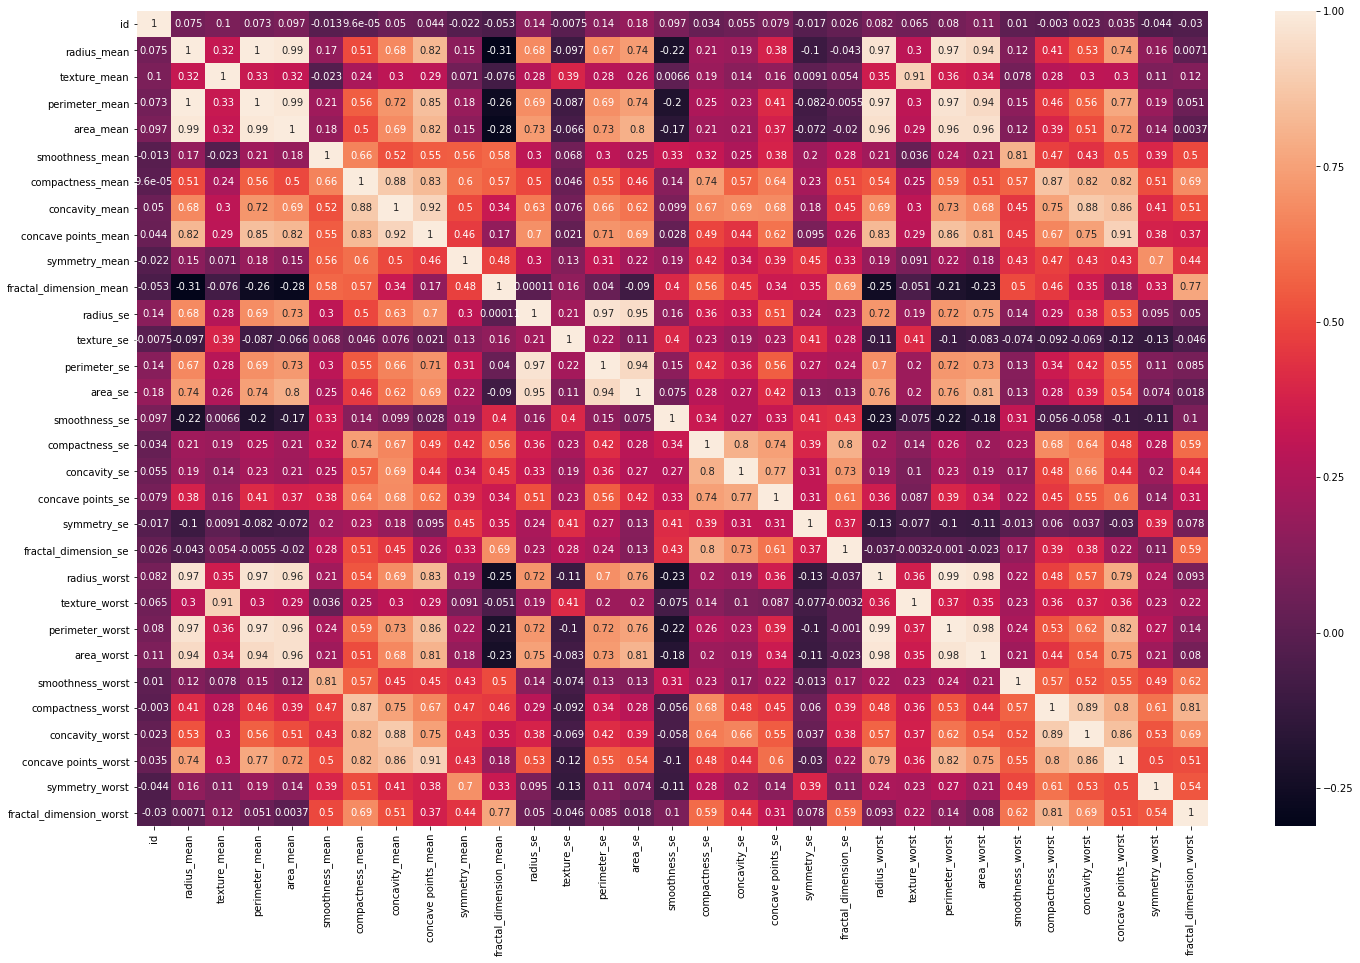

In [14]:
# checking correlation with heatmap
correlation=data.corr() # putting the correlation data into a variable called correlation
plt.figure(figsize = (24,15)) # if figsize is not mentioned, python we assume the default size and 
#if there are a lot of variables then it might look messy
sns.heatmap(correlation,annot=True) #annot=True is to add values to the graph

#### Converting the cateogrical values into numerical

In [15]:


data.diagnosis=[1 if each == "M" else 0 for each in data.diagnosis]

print(data.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

####  Splitting the dataset to X and Y variable

It is immportant to split the dataset into training and testing so that model can learn from training dataset and perform on testing dataset. The test size for the dataset varies from industry to industry. However, a standard of 70-30 is taken in general, where 70 % of the data set is used for training and 30 % of the data is used for testing

In [30]:
y=data.diagnosis.values # Diagnosis would be the Y variable

x_data=data.drop(["diagnosis"], axis=1) # dropping diagonisis so that all the other variables are stored in x_data

#normalization
X=(x_data-np.min(x_data))/(np.max(x_data) -np.min(x_data)) # all the variables from x_data is bought into X

In [31]:
#train test split
from sklearn.model_selection import train_test_split # from model_selection importing train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10) # Test size is only 10 % of the entire dataset

#### Building the model

In [33]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree from sklearns tree
dt= DecisionTreeClassifier() #Storing DecisionTreeClassifier into a variable dt so that it makes it easier to write the code
dt.fit(X_train,y_train) # fitting the training and testing data set into the model
print("score :",dt.score(X_test,y_test)) # getting the accuracy score.

score : 0.9122807017543859


#### Conclusion: 
From the accuracy score of the testing model we can conclude that the 91 % of the diagonisis in the dataset is correct.